# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 591


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [6]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?appid=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}&q={city}&units=metric"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        city_weather = requests.get(city_url).json()
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | badger
City not found. Skipping...
Processing Record 2 of Set 1 | georgetown
City not found. Skipping...
Processing Record 3 of Set 1 | albany
City not found. Skipping...
Processing Record 4 of Set 1 | howard springs
City not found. Skipping...
Processing Record 5 of Set 1 | karachi
City not found. Skipping...
Processing Record 6 of Set 1 | grytviken
City not found. Skipping...
Processing Record 7 of Set 1 | kasulu
City not found. Skipping...
Processing Record 8 of Set 1 | bethel
City not found. Skipping...
Processing Record 9 of Set 1 | ypsonas
City not found. Skipping...
Processing Record 10 of Set 1 | ha'il
City not found. Skipping...
Processing Record 11 of Set 1 | hirara
City not found. Skipping...
Processing Record 12 of Set 1 | avarua
City not found. Skipping...
Processing Record 13 of Set 1 | tevriz
City not found. Skipping...
Processing Record 14 of Set 1 | tadine
City not found. Skippin

In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          549
Lat           549
Lng           549
Max Temp      549
Humidity      549
Cloudiness    549
Wind Speed    549
Country       549
Date          549
dtype: int64

In [9]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,manggar,-2.8833,108.2667,24.96,89,100,3.22,ID,1737960377
1,waitangi,-43.9535,-176.5597,14.34,86,13,1.79,NZ,1737960378
2,anadyr,64.7500,177.4833,-31.72,68,75,5.00,RU,1737960379
3,papatowai,-46.5619,169.4708,13.90,61,34,5.02,NZ,1737960380
4,ushuaia,-54.8000,-68.3000,6.81,87,75,1.54,AR,1737960381


In [10]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [11]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,manggar,-2.8833,108.2667,24.96,89,100,3.22,ID,1737960377
1,waitangi,-43.9535,-176.5597,14.34,86,13,1.79,NZ,1737960378
2,anadyr,64.7500,177.4833,-31.72,68,75,5.00,RU,1737960379
3,papatowai,-46.5619,169.4708,13.90,61,34,5.02,NZ,1737960380
4,ushuaia,-54.8000,-68.3000,6.81,87,75,1.54,AR,1737960381


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

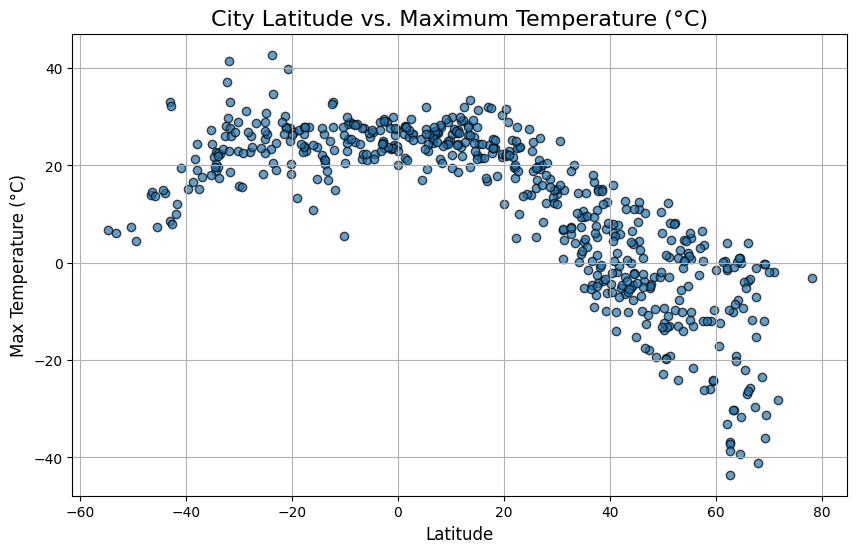

In [12]:
# Build scatter plot for latitude vs. temperature
plt.figure(figsize=(10, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor="black", alpha=0.7)


# Incorporate the other graph properties
plt.title("City Latitude vs. Maximum Temperature (°C)", fontsize=16)
plt.xlabel("Latitude", fontsize=12)
plt.ylabel("Max Temperature (°C)", fontsize=12)
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

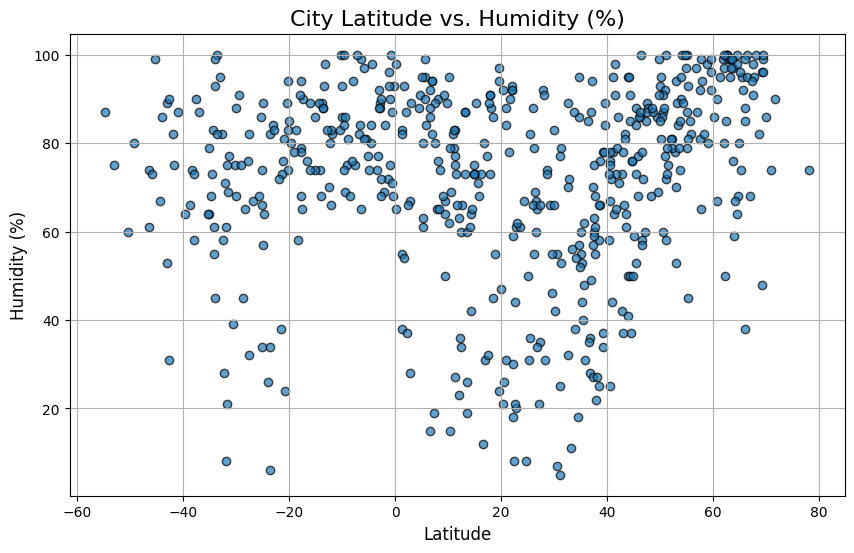

In [13]:
# Build the scatter plots for latitude vs. humidity
plt.figure(figsize=(10, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor="black", alpha=0.7)


# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%)", fontsize=16)
plt.xlabel("Latitude", fontsize=12)
plt.ylabel("Humidity (%)", fontsize=12)
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

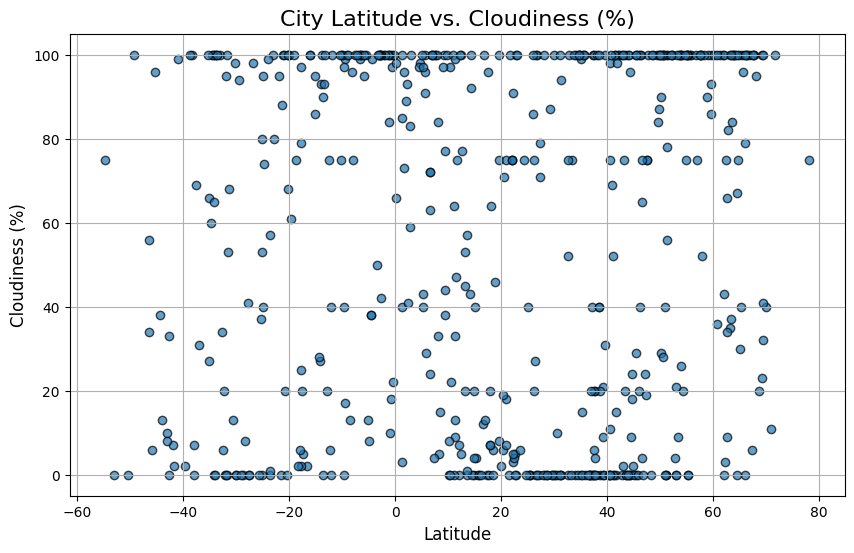

In [14]:
# Build the scatter plots for latitude vs. cloudiness
plt.figure(figsize=(10, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor="black", alpha=0.7)


# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%)", fontsize=16)
plt.xlabel("Latitude", fontsize=12)
plt.ylabel("Cloudiness (%)", fontsize=12)
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

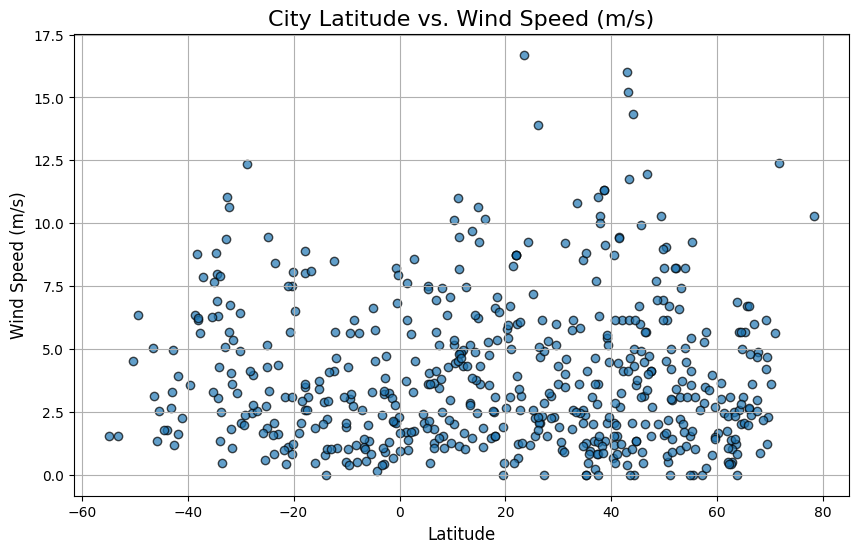

In [15]:
# Build the scatter plots for latitude vs. wind speed
plt.figure(figsize=(10, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor="black", alpha=0.7)


# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (m/s)", fontsize=16)
plt.xlabel("Latitude", fontsize=12)
plt.ylabel("Wind Speed (m/s)", fontsize=12)
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [20]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, hemisphere, title, xlabel, ylabel, save_path):
     """
    Creates a scatter plot with a linear regression line, including the model formula and R² value.

    Parameters:
    - x_values: Series or array of x-axis values.
    - y_values: Series or array of y-axis values.
    - hemisphere: "Northern Hemisphere" or "Southern Hemisphere".
    - title: Title of the plot.
    - xlabel: Label for the x-axis.
    - ylabel: Label for the y-axis.
    - save_path: Path to save the plot image.
    """   

In [21]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,anadyr,64.7500,177.4833,-31.72,68,75,5.00,RU,1737960379
7,wailua homesteads,22.0669,-159.3780,19.44,92,75,8.75,US,1737960385
8,yuzhno-kurilsk,44.0306,145.8556,-0.14,95,100,14.33,RU,1737960386
10,nadym,65.5333,72.5167,-21.95,95,100,6.72,RU,1737960388
11,nemuro,43.3236,145.5750,0.59,82,100,11.77,JP,1737960389


In [22]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]


# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,manggar,-2.8833,108.2667,24.96,89,100,3.22,ID,1737960377
1,waitangi,-43.9535,-176.5597,14.34,86,13,1.79,NZ,1737960378
3,papatowai,-46.5619,169.4708,13.90,61,34,5.02,NZ,1737960380
4,ushuaia,-54.8000,-68.3000,6.81,87,75,1.54,AR,1737960381
5,coquimbo,-29.9533,-71.3436,15.85,88,0,2.06,CL,1737960382


###  Temperature vs. Latitude Linear Regression Plot

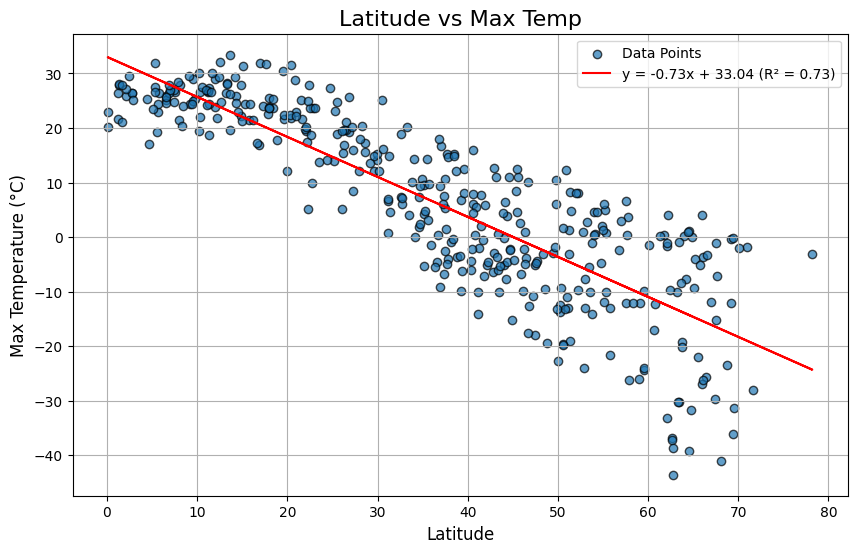

Linear Regression Results:
Slope: -0.7331655538170345
Intercept: 33.04133820930549
R-squared: 0.7251953169741389


In [25]:
# Linear regression on Northern Hemisphere
# Perform linear regression on Northern Hemisphere: Temperature vs. Latitude
slope, intercept, r_value, p_value, std_err = linregress(
    northern_hemi_df["Lat"], northern_hemi_df["Max Temp"]
)
# Create the regression line
regression_line = slope * northern_hemi_df["Lat"] + intercept

# Plot the data and regression line
plt.figure(figsize=(10, 6))
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], edgecolor="black", alpha=0.7, label="Data Points")
plt.plot(northern_hemi_df["Lat"], regression_line, color="red", label=f"y = {slope:.2f}x + {intercept:.2f} (R² = {r_value**2:.2f})")

# Add titles and labels
plt.title("Latitude vs Max Temp", fontsize=16)
plt.xlabel("Latitude", fontsize=12)
plt.ylabel("Max Temperature (°C)", fontsize=12)
plt.legend()
plt.grid(True)

# Show plot
plt.show()

# Print the results of the regression
print(f"Linear Regression Results:")
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-squared: {r_value**2}")

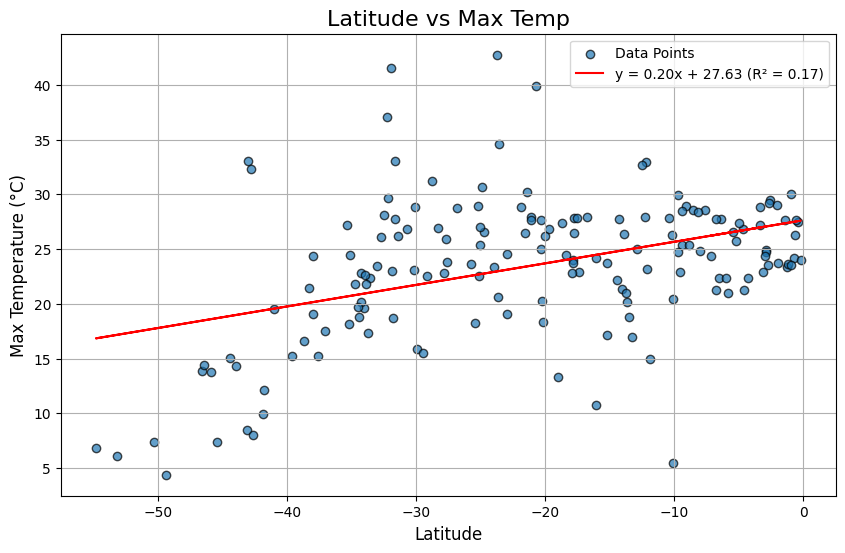

Linear Regression Results:
Slope: 0.1967736573151801
Intercept: 27.62928949441973
R-squared: 0.17252397365107383


In [26]:
# Linear regression on Southern Hemisphere
slope, intercept, r_value, p_value, std_err = linregress(
    southern_hemi_df["Lat"], southern_hemi_df["Max Temp"]
)

# Create the regression line
regression_line = slope * southern_hemi_df["Lat"] + intercept

# Plot the data and regression line
plt.figure(figsize=(10, 6))
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], edgecolor="black", alpha=0.7, label="Data Points")
plt.plot(southern_hemi_df["Lat"], regression_line, color="red", label=f"y = {slope:.2f}x + {intercept:.2f} (R² = {r_value**2:.2f})")

# Add titles and labels
plt.title("Latitude vs Max Temp", fontsize=16)
plt.xlabel("Latitude", fontsize=12)
plt.ylabel("Max Temperature (°C)", fontsize=12)
plt.legend()
plt.grid(True)

# Show plot
plt.show()

# Print the results of the regression
print(f"Linear Regression Results:")
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-squared: {r_value**2}")

**Discussion about the linear relationship:** 
Northern Hemisphere:
Slope: -0.7332
Intercept: 33.0413
R² (Coefficient of Determination): 0.7252
The results show a strong negative correlation between latitude and temperature in the Northern Hemisphere. As latitude increases (moving farther north), the maximum temperature decreases. This aligns with expectations since higher latitudes in the Northern Hemisphere generally correspond to cooler climates due to less direct sunlight.

Observation: The high R² value (0.7252) indicates that approximately 72.5% of the variation in temperature can be explained by latitude alone. The remaining variation might be due to factors like altitude, proximity to water bodies, and seasonal effects.

Southern Hemisphere:
Slope: 0.1968
Intercept: 27.6293
R² (Coefficient of Determination): 0.1725
In the Southern Hemisphere, there is a weak positive correlation between latitude and temperature. As latitude increases (moving closer to the equator), temperatures tend to rise slightly. However, the relationship is not as pronounced as in the Northern Hemisphere.

Observation: The low R² value (0.1725) indicates that latitude explains only 17.25% of the temperature variation. This weak correlation could be due to the Southern Hemisphere's geography, where oceans dominate and moderate temperatures more effectively than land.

### Humidity vs. Latitude Linear Regression Plot

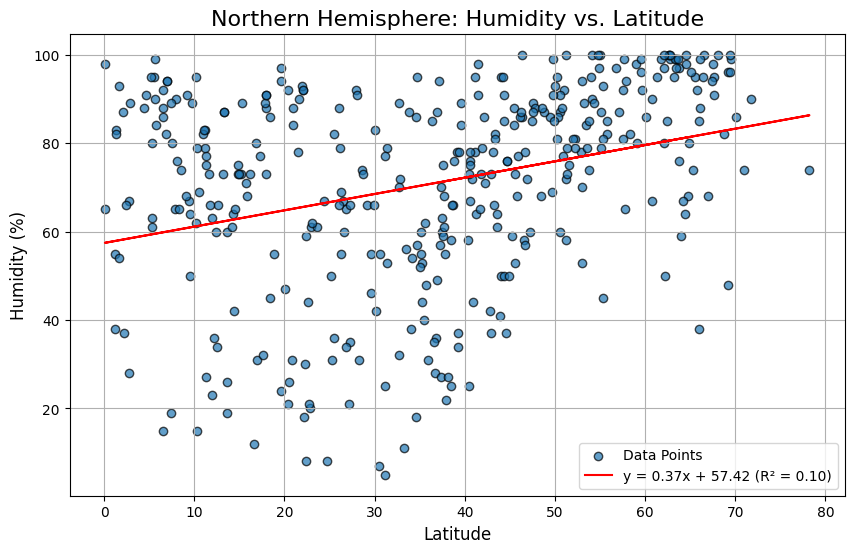

Linear Regression Results:
Slope: 0.3692831752558764
Intercept: 57.42169254770078
R-squared: 0.09874556889492578


In [27]:
# Northern Hemisphere
slope, intercept, r_value, p_value, std_err = linregress(
    northern_hemi_df["Lat"], northern_hemi_df["Humidity"]
)

# Create the regression line
regression_line = slope * northern_hemi_df["Lat"] + intercept

# Plot the data and regression line
plt.figure(figsize=(10, 6))
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], edgecolor="black", alpha=0.7, label="Data Points")
plt.plot(northern_hemi_df["Lat"], regression_line, color="red", label=f"y = {slope:.2f}x + {intercept:.2f} (R² = {r_value**2:.2f})")

# Add titles and labels
plt.title("Northern Hemisphere: Humidity vs. Latitude", fontsize=16)
plt.xlabel("Latitude", fontsize=12)
plt.ylabel("Humidity (%)", fontsize=12)
plt.legend()
plt.grid(True)

# Show plot
plt.show()

# Print the results of the regression
print(f"Linear Regression Results:")
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-squared: {r_value**2}")

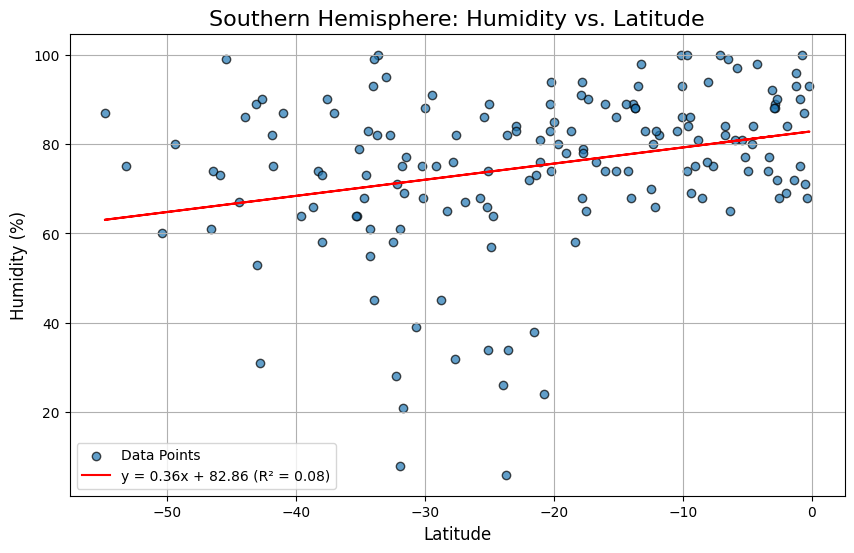

Linear Regression Results:
Slope: 0.3613869772663781
Intercept: 82.85927310853359
R-squared: 0.0777787711412082


In [28]:
# Southern Hemisphere
slope, intercept, r_value, p_value, std_err = linregress(
    southern_hemi_df["Lat"], southern_hemi_df["Humidity"]
)

# Create the regression line
regression_line = slope * southern_hemi_df["Lat"] + intercept

# Plot the data and regression line
plt.figure(figsize=(10, 6))
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], edgecolor="black", alpha=0.7, label="Data Points")
plt.plot(southern_hemi_df["Lat"], regression_line, color="red", label=f"y = {slope:.2f}x + {intercept:.2f} (R² = {r_value**2:.2f})")

# Add titles and labels
plt.title("Southern Hemisphere: Humidity vs. Latitude", fontsize=16)
plt.xlabel("Latitude", fontsize=12)
plt.ylabel("Humidity (%)", fontsize=12)
plt.legend()
plt.grid(True)

# Show plot
plt.show()

# Print the results of the regression
print(f"Linear Regression Results:")
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-squared: {r_value**2}")

**Discussion about the linear relationship:** 
Northern Hemisphere:
Slope: 0.3693
Intercept: 57.4217
R-squared (R²): 0.0987
The relationship between humidity and latitude in the Northern Hemisphere shows a very weak positive correlation. While the slope is slightly positive, indicating an increase in humidity with latitude, the R² value suggests that latitude explains only about 9.87% of the variation in humidity.

Observation: The low R² value indicates that other factors, such as proximity to water bodies, altitude, and local weather patterns, likely have a stronger impact on humidity than latitude alone.

Southern Hemisphere:
Slope: 0.3614
Intercept: 82.8593
R-squared (R²): 0.0778
Similarly, in the Southern Hemisphere, the relationship between humidity and latitude is also a weak positive correlation. The slope indicates a slight increase in humidity as latitude approaches the equator, but the R² value of 0.0778 suggests that latitude explains only 7.78% of the variation in humidity.

Observation: The weak correlation may result from the dominance of oceans in the Southern Hemisphere, which stabilize humidity levels regardless of latitude.

### Cloudiness vs. Latitude Linear Regression Plot

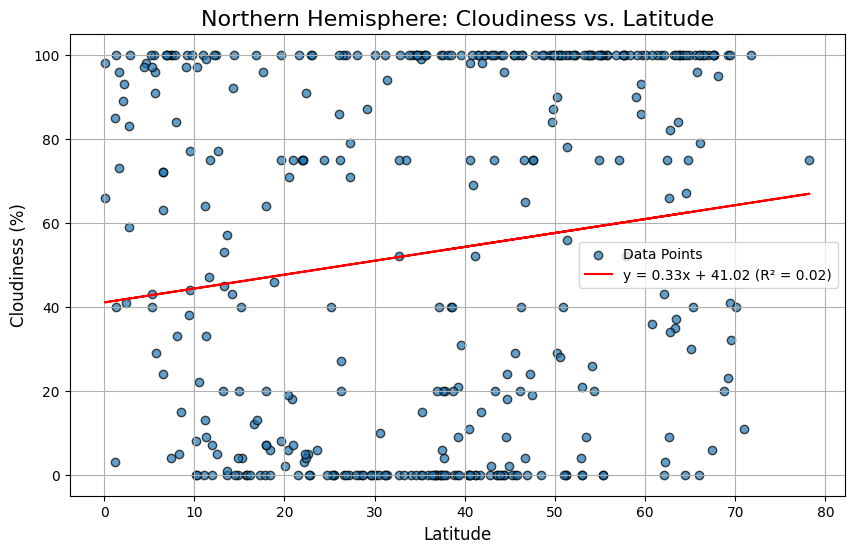

Linear Regression Results:
Slope: 0.33089696620362674
Intercept: 41.019656585578815
R-squared: 0.023047617308943193


In [29]:
# Northern Hemisphere
slope, intercept, r_value, p_value, std_err = linregress(
    northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"]
)

# Create the regression line
regression_line = slope * northern_hemi_df["Lat"] + intercept

# Plot the data and regression line
plt.figure(figsize=(10, 6))
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], edgecolor="black", alpha=0.7, label="Data Points")
plt.plot(northern_hemi_df["Lat"], regression_line, color="red", label=f"y = {slope:.2f}x + {intercept:.2f} (R² = {r_value**2:.2f})")

# Add titles and labels
plt.title("Northern Hemisphere: Cloudiness vs. Latitude", fontsize=16)
plt.xlabel("Latitude", fontsize=12)
plt.ylabel("Cloudiness (%)", fontsize=12)
plt.legend()
plt.grid(True)

# Show plot
plt.show()

# Print the results of the regression
print(f"Linear Regression Results:")
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-squared: {r_value**2}")

The r^2-value is: 0.018616831531634456


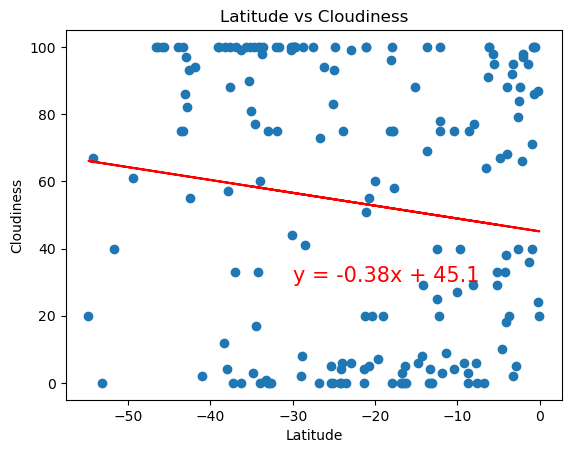

In [20]:
# Southern Hemisphere
slope, intercept, r_value, p_value, std_err = linregress(
    southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"]
)

# Create the regression line
regression_line = slope * southern_hemi_df["Lat"] + intercept

# Plot the data and regression line
plt.figure(figsize=(10, 6))
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], edgecolor="black", alpha=0.7, label="Data Points")
plt.plot(southern_hemi_df["Lat"], regression_line, color="red", label=f"y = {slope:.2f}x + {intercept:.2f} (R² = {r_value**2:.2f})")

# Add titles and labels
plt.title("Southern Hemisphere: Cloudiness vs. Latitude", fontsize=16)
plt.xlabel("Latitude", fontsize=12)
plt.ylabel("Cloudiness (%)", fontsize=12)
plt.legend()
plt.grid(True)

# Show plot
plt.show()

# Print the results of the regression
print(f"Linear Regression Results:")
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-squared: {r_value**2}")

**Discussion about the linear relationship:** 
Northern Hemisphere:
Slope: 0.3309
Intercept: 41.0197
R-squared (R²): 0.0230
In the Northern Hemisphere, the regression analysis reveals a very weak positive correlation between cloudiness and latitude. The slight increase in cloudiness with latitude is barely noticeable, as the R² value indicates that latitude explains only 2.3% of the variation in cloudiness.

Key Observations:
Cloudiness does not significantly depend on latitude in the Northern Hemisphere.
Other atmospheric factors, such as local weather systems, ocean currents, and seasonal changes, likely play a larger role in cloudiness levels.


Discussion of the Linear Relationship: Cloudiness vs. Latitude
Northern Hemisphere:
Slope: 0.3309
Intercept: 41.0197
R-squared (R²): 0.0230
In the Northern Hemisphere, the regression analysis reveals a very weak positive correlation between cloudiness and latitude. The slight increase in cloudiness with latitude is barely noticeable, as the R² value indicates that latitude explains only 2.3% of the variation in cloudiness.

Key Observations:
Cloudiness does not significantly depend on latitude in the Northern Hemisphere.
Other atmospheric factors, such as local weather systems, ocean currents, and seasonal changes, likely play a larger role in cloudiness levels.

Southern Hemisphere:
Slope: 0.9458
Intercept: 78.4015
R-squared (R²): 0.0998
In the Southern Hemisphere, there is a weak positive correlation between cloudiness and latitude. Cloudiness tends to increase slightly as latitude approaches the equator, but the relationship is still weak, with latitude explaining only 9.98% of the variation in cloudiness.

Key Observations:
Cloudiness appears to have a slightly stronger relationship with latitude in the Southern Hemisphere compared to the Northern Hemisphere, as reflected by the higher R² value.
Despite this, the influence of latitude remains minimal, and other meteorological or geographical factors are likely more influential.

### Wind Speed vs. Latitude Linear Regression Plot

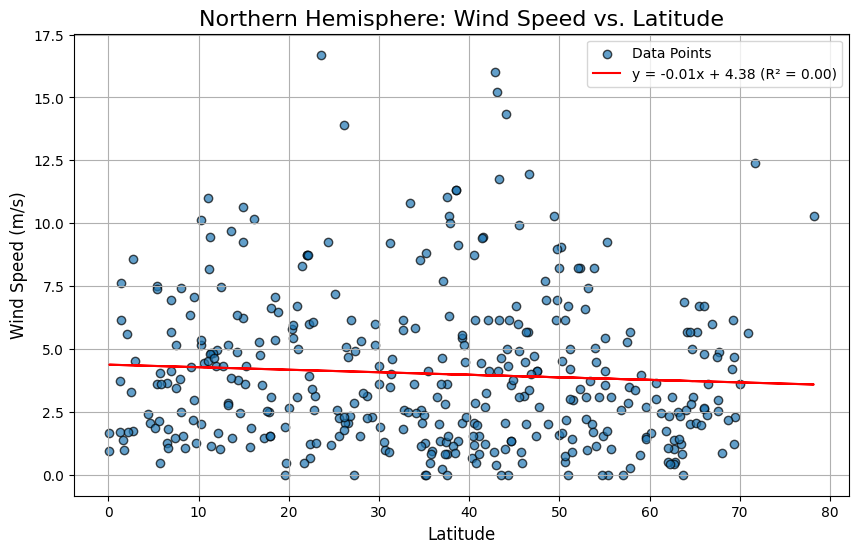

Linear Regression Results:
Slope: -0.010068926417394845
Intercept: 4.376118716565527
R-squared: 0.0041926657867963095


In [30]:
# Northern Hemisphere
slope, intercept, r_value, p_value, std_err = linregress(
    northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"]
)

# Create the regression line
regression_line = slope * northern_hemi_df["Lat"] + intercept

# Plot the data and regression line
plt.figure(figsize=(10, 6))
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], edgecolor="black", alpha=0.7, label="Data Points")
plt.plot(northern_hemi_df["Lat"], regression_line, color="red", label=f"y = {slope:.2f}x + {intercept:.2f} (R² = {r_value**2:.2f})")

# Add titles and labels
plt.title("Northern Hemisphere: Wind Speed vs. Latitude", fontsize=16)
plt.xlabel("Latitude", fontsize=12)
plt.ylabel("Wind Speed (m/s)", fontsize=12)
plt.legend()
plt.grid(True)

# Show plot
plt.show()

# Print the results of the regression
print(f"Linear Regression Results:")
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-squared: {r_value**2}")

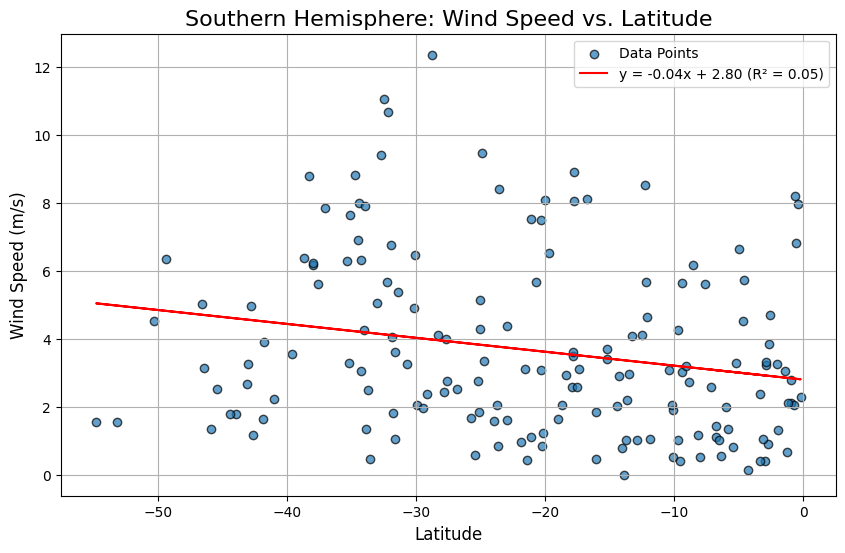

Linear Regression Results:
Slope: -0.04089985564421818
Intercept: 2.7983022319311197
R-squared: 0.04703288175624316


In [31]:
# Southern Hemisphere
slope, intercept, r_value, p_value, std_err = linregress(
    southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"]
)

# Create the regression line
regression_line = slope * southern_hemi_df["Lat"] + intercept

# Plot the data and regression line
plt.figure(figsize=(10, 6))
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], edgecolor="black", alpha=0.7, label="Data Points")
plt.plot(southern_hemi_df["Lat"], regression_line, color="red", label=f"y = {slope:.2f}x + {intercept:.2f} (R² = {r_value**2:.2f})")

# Add titles and labels
plt.title("Southern Hemisphere: Wind Speed vs. Latitude", fontsize=16)
plt.xlabel("Latitude", fontsize=12)
plt.ylabel("Wind Speed (m/s)", fontsize=12)
plt.legend()
plt.grid(True)

# Show plot
plt.show()

# Print the results of the regression
print(f"Linear Regression Results:")
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-squared: {r_value**2}")

**Discussion about the linear relationship:** 
Northern Hemisphere:
Slope: -0.0101
Intercept: 4.3761
R-squared (R²): 0.0042
In the Northern Hemisphere, the regression results indicate a very weak negative correlation between wind speed and latitude. The slope shows a slight decrease in wind speed as latitude increases, but the magnitude is negligible. The R² value suggests that latitude explains only 0.42% of the variation in wind speed, implying that other factors have a dominant role.

Key Observations:
Wind speed is largely unaffected by latitude in the Northern Hemisphere.
Localized factors such as seasonal storms, pressure gradients, and geographical features likely play a much more significant role.


Discussion of the Linear Relationship: Wind Speed vs. Latitude
Northern Hemisphere:
Slope: -0.0101
Intercept: 4.3761
R-squared (R²): 0.0042
In the Northern Hemisphere, the regression results indicate a very weak negative correlation between wind speed and latitude. The slope shows a slight decrease in wind speed as latitude increases, but the magnitude is negligible. The R² value suggests that latitude explains only 0.42% of the variation in wind speed, implying that other factors have a dominant role.

Key Observations:
Wind speed is largely unaffected by latitude in the Northern Hemisphere.
Localized factors such as seasonal storms, pressure gradients, and geographical features likely play a much more significant role.
Southern Hemisphere:
Slope: -0.0409
Intercept: 2.7983
R-squared (R²): 0.0470
In the Southern Hemisphere, the regression results also show a weak negative correlation between wind speed and latitude. As latitude increases, moving closer to the equator, wind speed slightly decreases. However, the small R² value indicates that latitude explains only 4.7% of the variation in wind speed.

Key Observations:
Wind speed trends are slightly more pronounced in the Southern Hemisphere than in the Northern Hemisphere, as reflected by the larger slope and R² value.
Oceanic influences, such as trade winds and cyclone activity, may contribute to this slight trend.